In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch

In [13]:
sim_action_rewards = pd.read_csv('sim_action_rewards.csv')

In [14]:
display(sim_action_rewards[:100])

,action,action_selected_by_network,cur_weights,current_price,fc_input,pred_future_rewards,reward,selected_by_network,selected_pred_future_rewards,step_buy_reward,weightedAvgPrice
0,2.0,"tensor([2], device='cuda:0')","tensor([ 0.2230, -0.6377, -0.8109, -0.1603, 0...",1.3000,"tensor([-1.2674e+00, -2.0000e+00, -2.0000e+00,...","tensor([[ 0.0946, -0.8269, 0.2157]], device='...",0.0,1.0,0.215740,0.022774,1.322774
1,2.0,"tensor([2], device='cuda:0')",NaN,1.3000,NaN,"tensor([[1.6662e-01, 1.8248e+00, 2.1848e+03]],...",0.0,0.0,2184.815674,0.022774,1.322774
2,2.0,"tensor([2], device='cuda:0')",NaN,1.3000,NaN,"tensor([[ 0.6109, 1.4789, 213.4241]], devic...",0.0,0.0,213.424072,0.022774,1.322774
3,2.0,"tensor([2], device='cuda:0')",NaN,1.3000,NaN,"tensor([[1.8666e-01, 1.0986e+00, 5.1970e+02]],...",0.0,0.0,519.699768,0.022774,1.322774
4,2.0,"tensor([2], device='cuda:0')","tensor([ 0.2230, -0.6377, -0.8109, -0.1603, 0...",1.3000,"tensor([-1.2673e+00, -2.0000e+00, -2.0000e+00,...","tensor([[ 0.0998, -0.8245, 0.2095]], device='...",0.0,1.0,0.209514,0.022774,1.322774
...,...,...,...,...,...,...,...,...,...,...,...
95,2.0,"tensor([2], device='cuda:0')","tensor([ 0.2228, -0.6380, -0.8112, -0.1606, 0...",1.3011,"tensor([-1.2707e+00, -2.0000e+00, -2.0000e+00,...","tensor([[ 0.0483, -0.8234, 0.1521]], device='...",0.0,1.0,0.152146,0.021651,1.322751
96,2.0,"tensor([2], device='cuda:0')","tensor([ 0.2228, -0.6380, -0.8112, -0.1606, 0...",1.3011,"tensor([-1.2706e+00, -2.0000e+00, -2.0000e+00,...","tensor([[ 0.0484, -0.8234, 0.1523]], device='...",0.0,1.0,0.152313,0.021651,1.322751
97,2.0,"tensor([2], device='cuda:0')","tensor([ 0.2228, -0.6380, -0.8112, -0.1606, 0...",1.3009,"tensor([-1.2711e+00, -2.0000e+00, -2.0000e+00,...","tensor([[ 0.0481, -0.8234, 0.1531]], device='...",0.0,1.0,0.153081,0.021850,1.322750
98,2.0,"tensor([2], device='cuda:0')",NaN,1.3009,NaN,"tensor([[1.7227e+00, 1.2889e+00, 1.6429e+03]],...",0.0,0.0,1642.868164,0.021850,1.322750


In [45]:
def show_weighting(step):
    print(step['cur_weights'])
    if not isinstance(type(step['cur_weights']), float): #not np.isnan(step['cur_weights']):
        print('HERERE')
        cur_weights = step['cur_weights'].replace('"', '').replace(' ', '').\
                replace('\n', '').replace(']', '').replace('tensor([', '').split(',')[:-1]

        fc_input = step['fc_input'].replace('"', '').replace(' ', '').\
                replace('\n', '').replace(']', '').replace("tensor([", '').split(',')[:-1]
        
        print(fc_input)

        cur_weights = np.array(cur_weights, dtype=np.float)
        fc_input = np.array(fc_input, dtype=np.float)

        print(cur_weights.shape)
        print(fc_input.shape, "\n\n")

action                                                                          2
action_selected_by_network                           tensor([2], device='cuda:0')
cur_weights                     tensor([ 0.2228, -0.6380, -0.8112, -0.1606,  0...
current_price                                                              1.3009
fc_input                        tensor([-1.2711e+00, -2.0000e+00, -2.0000e+00,...
pred_future_rewards             tensor([[ 0.0481, -0.8234,  0.1531]], device='...
reward                                                                          0
selected_by_network                                                             1
selected_pred_future_rewards                                             0.153081
step_buy_reward                                                         0.0218503
weightedAvgPrice                                                          1.32275
Name: 97, dtype: object
tensor([ 0.2228, -0.6380, -0.8112, -0.1606,  0.7450,  0.6614, -0.2977,  0.

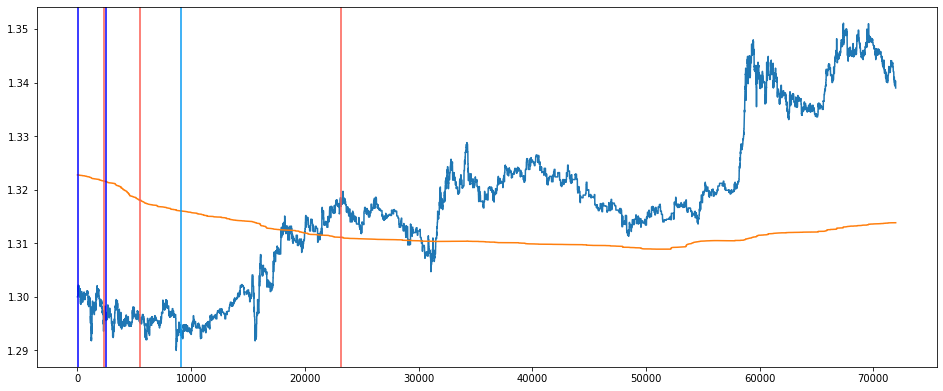

In [47]:
# in order to modify the size
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])

sim_action_rewards = sim_action_rewards.drop_duplicates()

ax.plot(sim_action_rewards.index, sim_action_rewards['current_price'])
ax.plot(sim_action_rewards.index, sim_action_rewards['weightedAvgPrice'])

buy_sells = sim_action_rewards[sim_action_rewards['action'] != 2.0]
buy_sells = buy_sells[buy_sells["reward"] != 0.0]
buy_sells = buy_sells.reset_index(drop=False)

#display(buy_sells[:10])
print(sim_action_rewards.iloc[97])
show_weighting(sim_action_rewards.iloc[97])

for sell_index in buy_sells[buy_sells['action'] == 1.0]['index'].values[:3]:
    sell = buy_sells[buy_sells['index']==sell_index]
    buy = buy_sells[buy_sells.index==sell.index[0]-1]
    
    ax.axvline(x=sell['index'].values[0], color='r' if sell['selected_by_network'].values[0] else '#FC5A50'  )
    ax.axvline(x=buy['index'].values[0], color='b' if buy['selected_by_network'].values[0] else '#069AF3' )
    
    #print(buy['index'], sell['index'])    
    #print(buy, sell, "\n\n\n")
    #show_weighting(sell)
    


In [17]:
import pickle
import numpy as np
filename = 'step_losses'

TypeError: '>=' not supported between instances of 'NoneType' and 'int'

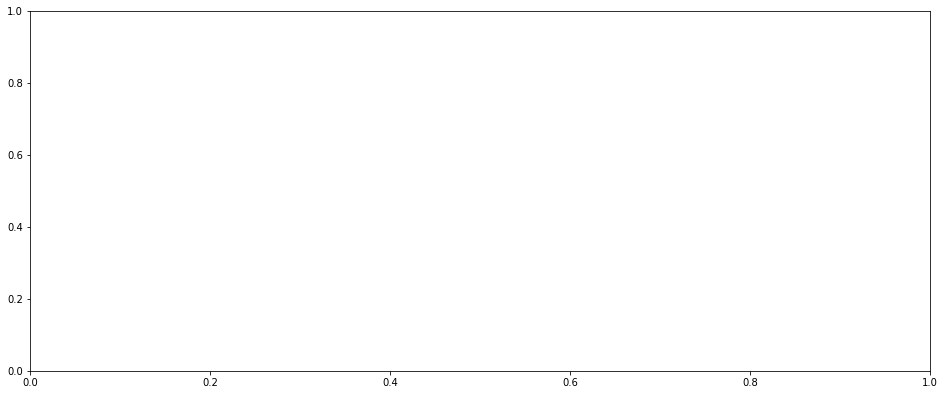

In [18]:
with open(filename+'.pkl', 'rb') as f:
    losses = pickle.load(f)
    
    
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])

ax.plot(range(len(losses)), np.clip(losses, 0, 0.5))